# Standard outputs of EVcouplings pipeline


This notebook explains the contents of the most commonly used output files of EVcouplings. It also demonstrates how to work with the files using the EVcouplings module, if applicable.

For each output file, there is a "output key" which can be used to programmatically access pipeline outputs. All output keys and their specified values (paths to output files) are specified in the final output stage file (\_final\_global\_state.outcfg). See part 5 for more information. 

## Content

- Part 1: Alignment and alignment statistics

- Part 2: Coupling scores and comparison to structure 

- Part 3: Model parameters (see model_parameters_mutation_effects.ipynb for tutorial)

- Part 4: Folded models and their ranking

- Part 5: Configuration and programmatic output

- Part 6: Additional files

In [1]:
import pandas as pd

------

## Part 1: Alignment and alignment statistics

For the monomer pipeline, the alignment is found in the align subdirectory of the output folder. For the complexes pipeline, the concatenated alignment is found in the concatenate subdirectory, and the individual monomer alignments are found in the align_1 and align_2 subdirectories. 

### Final alignment file (.a2m)

The final alignment file in [.a2m format](https://compbio.soe.ucsc.edu/a2m-desc.html). This file is used to calculate evolutionary couplings (ECs). Lowercase columns indicate columns with too many gaps that did not meet the minimum column coverage threshold, which means they were excluded from the EC calculation. Lowercase columns have a '.' for gap character by convention. Additionally, sequences which did not fulfill the the minimum sequence coverage threshold (i.e. fragments with too many gaps) have been removed from this alignment. 

*output key: alignment_file*

In [ ]:
from evcouplings.align import Alignment

# Load the alignment - format will be detected automatically but can also be set manually
with open("example/PABP_YEAST.a2m") as f:
    aln = Alignment.from_file(f)

print("Alignment has {} sequences and {} columns".format(aln.N, aln.L))

#retrieve a particular sequence
sequence_id = "PABP_YEAST/115-210" #IDENTIFIER/POS_START-POS_END
print(sequence_id, "".join(aln[sequence_id]))

Alignment has 152041 sequences and 96 columns
PABP_YEAST/115-210 qrdpslrkKGSGNIFIKNLHPDIDNKALYDTFSVFGDILSSKIATDENGKSKGFGFVHFEEEGAAKEAIDALNGMLLNGQEIYVAPHLSRkerdsq


### Alignment and EC statistics summary (_job_statistics_summary.csv)

Contains information on properties of the final alignment. This file is only produced if the *evcouplings* application is run (otherwise see alignment_statistics.csv for a truncated version of this file, *output key: statistics_file*).

Columns:
   - prefix: run prefix
   - minimum_column_coverage: user input, fraction of non-gap characters required per column
   - num_seqs: number of sequences in final alignment
   - seqlen: length of target sequence (interchangeably called the query sequence)
   - num_cov: number of uppercase columns in final alignment (columns that satisfied minimumum_column_coverage) 
   - num_lc: number of lowercase columns in final alignment (columns that did not satisfy minimum_column_coverage)
   - perc_cov: fraction of columns that are uppercase (num_cov / seqlen)
   - 1st_uc: index of first uppercase column, numbered according to target sequence
   - last_uc: index of last uppercase column, numbered according to target sequence
   - len_cov: last_uc - 1st_uc
   - num_lc_cov: number of lowercase columns between 1st_uc and last_uc (i.e. num_cov = len_cov - num_lc_cov)
   - N_eff: effective number of non-redundant sequences after clustering based on theta parameter(similar neighborhood = 1 sequence)
   - domain_threshold: sequence search inclusion threshold
   - average_identity: average percent identity of sequences in the alignments to the target sequence
   
The following outputs are only added if the "couplings" and "compare" stages of the pipeline are also run, respectively:
   - num_significant: number of significant ECs (at 90% probabilitity cutoff)
   - precision: precision of the top L significant ECs compared to structure

In [3]:
df = pd.read_csv("example/test_job_statistics_summary.csv")
df.head()

,prefix,minimum_column_coverage,num_seqs,seqlen,num_cov,num_lc,perc_cov,1st_uc,last_uc,len_cov,num_lc_cov,N_eff,domain_threshold,num_significant,precision,average_identity
0,testrun2/test_b0.4,0.7,8158,156,151,5,0.968,4,156,153,2,5579.0,0.4,219.0,0.862,0.361
1,testrun2/test_b0.5,0.7,7948,156,151,5,0.968,4,156,153,2,5405.4,0.5,221.0,0.855,0.365
2,testrun2/test_b0.6,0.7,7768,156,151,5,0.968,4,156,153,2,5277.2,0.6,229.0,0.842,0.369


### Frequencies file (_frequencies.csv)


Contains the frequency of each character in each position of the alignment. These frequencies are raw, i.e. does not sequence reweighting.

*output key: frequencies_file*

Columns: 
- pos: position in alignment, numbered according to target sequence
- target_seq: character in target sequence
- conservation: column entropy. A value of 1 indicates perfect conservation. A value near zero indicates very little conservation.
- [chars]: the remaining columns are frequency of each character in that position in the alignment


In [4]:
df = pd.read_csv("example/test_b0.6_frequencies.csv")
df.head()

,pos,target_seq,conservation,-,A,C,D,E,F,G,...,M,N,P,Q,R,S,T,V,W,Y
0,3,S,0.806,0.721,0.000,0.000,0.0,0.0,0.000,0.000,...,0.000,0.000,0.0,0.0,0.0,0.279,0.000,0.000,0.000,0.000
1,4,L,0.475,0.210,0.011,0.002,0.0,0.0,0.038,0.000,...,0.116,0.000,0.0,0.0,0.0,0.001,0.001,0.034,0.000,0.003
2,5,I,0.685,0.063,0.002,0.001,0.0,0.0,0.001,0.000,...,0.011,0.000,0.0,0.0,0.0,0.000,0.000,0.212,0.000,0.000
3,6,A,0.501,0.047,0.307,0.003,0.0,0.0,0.014,0.001,...,0.003,0.000,0.0,0.0,0.0,0.006,0.003,0.401,0.164,0.018
4,7,A,0.868,0.044,0.920,0.013,0.0,0.0,0.000,0.005,...,0.000,0.001,0.0,0.0,0.0,0.007,0.002,0.004,0.000,0.000


### Identities file (_identities.csv)

Contains the sequence identity of each sequence in the alignment to the target sequence. 

*output key: identities_file*

columns:
- id: sequence identifier
- identity_to_query: fraction of sequence identity to the target sequence. 

In [5]:
df = pd.read_csv("example/test_b0.6_identities.csv")
df.head()

,id,identity_to_query
0,DYR_ECOLI/3-158,1.000
1,UniRef90_T1G9P0/7-179,0.301
2,UniRef90_R7UK12/8-184,0.276
3,UniRef90_R7UK12/198-373,0.250
4,UniRef90_H8KUH0/9-165,0.391


------

## Part 2: Coupling scores and comparison to structure

### Raw evolutionary couplings file (_ECs.txt)

Contains the space-delimited raw output of the evolutionary couplings calculation from plmc. For processed outputs, use the _CouplingScores.csv file or the _CouplingsScoresCompared.csv file explained below. 

*output key: raw_ec_file*

Columns:
- i: position i, numbered according to target sequence
- A_i: character in position i in target sequence
- j: position j, numbered according to target sequence
- A_j: character in position j in target sequence
- fn: placeholder column
- cn: Evolutionary couplings score (cn score)

To read the file and sort the EC pairs by score:

In [6]:
from evcouplings.couplings import read_raw_ec_file

#reads ECs as a pandas df and sorts ECs according to score
ecs = read_raw_ec_file("example/test_b0.6_ECs.txt") 
ecs.head()

,i,A_i,j,A_j,fn,cn
1421,13,V,121,G,0,2.514777
6683,58,K,73,T,0,2.418119
1734,16,M,17,E,0,2.288994
4323,36,L,56,G,0,2.110106
990,10,V,116,D,0,2.100550


### Coupling Scores File (_CouplingScores.csv)

Contains the evolutionary couplings sorted according to score, and the probability that a pair represents significant coupling rather than background noise (probability of belonging to the lognormal component of a lognormal (signal) - skew normal (noise) mixture model).

Note: this file contains couplings between positions that are close on the chain, which are known to be high due to short-range contacts in the molecule. You may want to filter these before further analysis. 

*output key: ec_file*

Columns:
- i: position i, numbered according to target sequence
- A_i: character in position i in target sequence
- Segment_i: (complexes only) specifies whether position i originates from the first monomer (A_1) or the second monomer (B_1). Position i is numbered according to its position _within_ the monomer sequence, not its overall position in the concatenated alignment. 
- j: position j, numbered according to target sequence
- A_j: character in position j in target sequence
- Segment_j: (complexes only) specifies whether position j originates from the first monomer (A_1) or the second monomer (B_1). Position j is numbered according to its position _within_ the monomer sequence, not its overall position in the concatenated alignment. 
- fn: placeholder column (formerly fn score)
- cn: Evolutionary couplings score (cn score)
- probability: Probability that this coupling is significant (i.e. in the lognormal signal tail)

In [7]:
import pandas as pd
df = pd.read_csv("example/test_b0.6_CouplingScores.csv")
df.head()

,i,A_i,j,A_j,fn,cn,probability
0,13,V,121,G,0,2.514777,1.0
1,58,K,73,T,0,2.418119,1.0
2,16,M,17,E,0,2.288994,1.0
3,36,L,56,G,0,2.110106,1.0
4,10,V,116,D,0,2.100550,1.0


### Cumulative coupling score file (_enrichment.csv)

Measures the how strongly individual residues are coupled by summing the coupling scores of pairs involving this residues, and then normalizing with the average level of coupling (i.e. enrichment of coupling on this residue relative to background). Highly enriched residues may indicate functionally important residues. Uses the top L ECs for calculation by default. 

*output key: enrichment_file*

Columns:
- i: position i
- A_i: character i
- enrichment: Sum of the evolutionary coupling scores that involve this residue, normalized by the background level of coupling

### Coupling Scores Compared Files (_CouplingScoresCompared.csv and _CouplingScoresCompared_longrange.csv)

Comparison of evolutionary couplings to 3D protein structures, to assess if ECs correspond to structural contacts (_longrange contains the same information except it does not contain couplings between residues within 5 positions on the sequence).

output key: *ec_compared_all_file*, *ec_compared_longrange_file*

Columns:
- i: position i, numbered according to target sequence
- A_i: character in position i in target sequence
- Segment_i: (complexes only) specifies whether position i originates from the first monomer (A_1) or the second monomer (B_1). Position i is numbered according to its position _within_ the monomer sequence, not its overall position in the concatenated alignment. 
- j: position j, numbered according to target sequence
- A_j: character in position j in target sequence
- Segment_j: (complexes only) specifies whether position j originates from the first monomer (A_1) or the second monomer (B_1). Position j is numbered according to its position _within_ the monomer sequence, not its overall position in the concatenated alignment. 
- fn: placeholder column (may contain fn score)
- cn: Evolutionary couplings score (cn score)
- probability: Probability that this is a significant EC
- dist_intra: minimum atom distance between ith and jth residue within chain (intra-molecular contacts). Column is not explicitly present unless user also requested comparison to multimer distances. 
- dist_multimer: minimum atom distance between ith and jth residue between chains of the same monomer (homomultimer contacts). Column not present if user did not specify multimer comparison. 
- dist_inter: (complexes only) minimum atom distance between the ith and jth residue between the two monomers (heteromultimer contacts)
- dist: If user specified multimer comparison, this is the minimum distance of residues i and j within or between molecules (min(dist_intra, dist_multimer, dist_inter)). If user did not request multimer comparison, this is simply the minimum intra-molecular distance.
- precision: Cumulative precision - for the Nth evolutionary coupling, the precision of the top N couplings. ECs are true positives if the distance between residues i and j does not exceed the specified distance threshold (default: 5 angstroms). 

In [ ]:
import pandas as pd
df = pd.read_csv("example/test_b0.6_CouplingScoresCompared_longrange.csv")
df.head()

,i,A_i,j,A_j,fn,cn,probability,dist_intra,dist_multimer,dist,precision
0,13,V,121,G,0,2.514777,1.0,2.876529,22.368808,2.876529,1.0
1,58,K,73,T,0,2.418119,1.0,3.170394,25.539273,3.170394,1.0
2,36,L,56,G,0,2.110106,1.0,2.954410,26.754039,2.954410,1.0
3,10,V,116,D,0,2.100550,1.0,3.012708,17.955233,3.012708,1.0
4,135,S,154,E,0,1.792571,1.0,2.450106,45.412241,2.450106,1.0


### Contact map files (.pdf)

Displays the evolutionary couplings together with experimental structure contacts. The number of evolutionary couplings displayed is specified by the user. Short-range evolutionary couplings (default: between residues that are within 5 positions on the chain) are not displayed by default.

- _N_ECs.pdf :N ECs are plotted

- _significant_ECs_X.pdf : ECs above the significance threshold X under the selected mixture model are plotted. 0 <= X <= 1

*output key: contact_map_files*

Legend:
- Blue dots: residues in contact within the molecule (intra-molecular contacts). Default distance threshold = 5 Angstrom
- Orange dots: residues in contact between the subunits (inter-molecular or multimer contacts). Default distance threshold = 5 Angstroms
- Black dots: evolutionary couplings

The graphics on the bottom and right side of the contact map show the secondary structure as determined from the crystal structure. Arrows correspond to beta strands and squiggly lines correspond to alpha helices. 

See the notebook distance_calculations.ipynb for a tutorial on how to interactively create contact maps yourself.

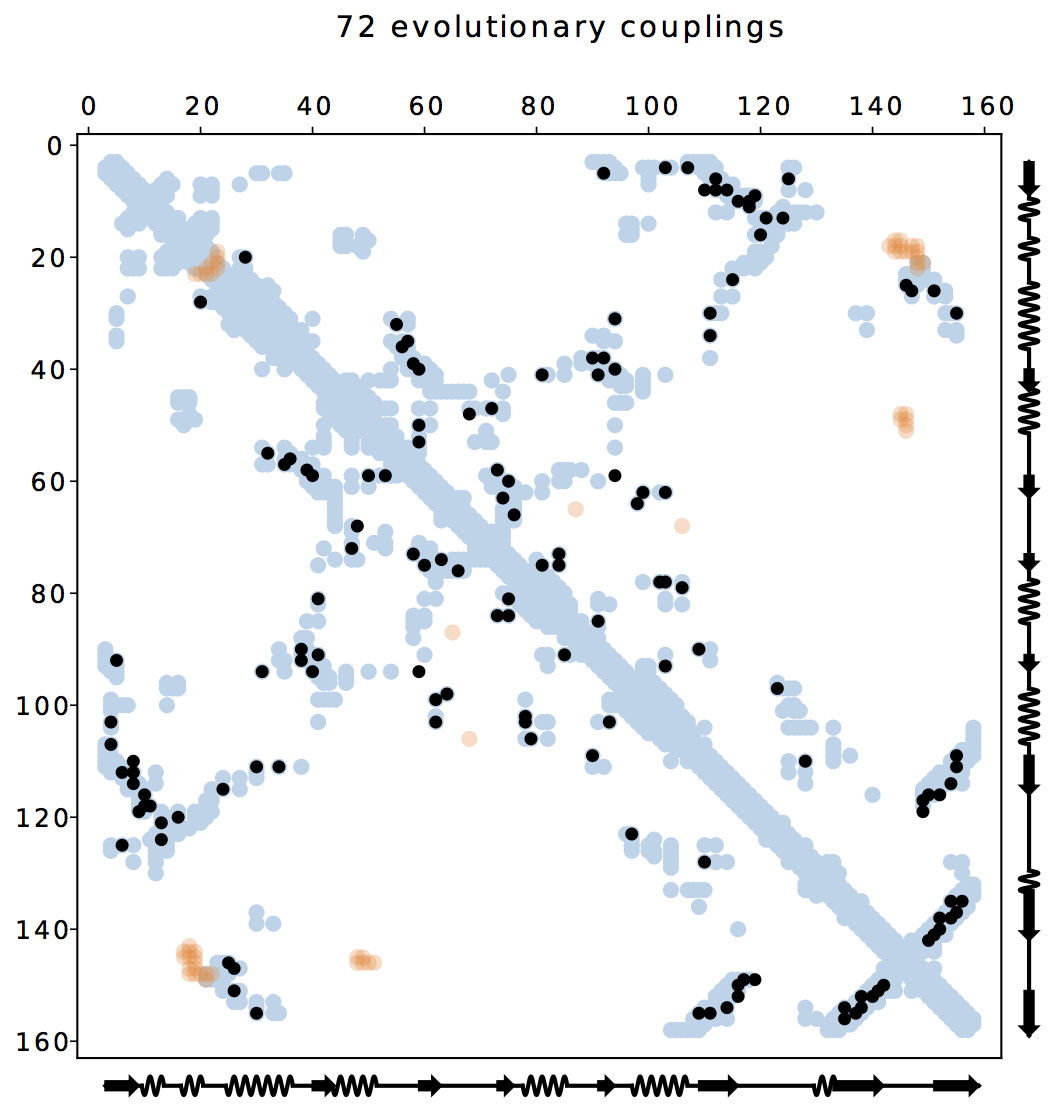

In [9]:
from IPython.display import Image
Image("example/test_b0.6_72_ECs.png", width=600, height=600)

------

## Part 3: Model Parameters

### Model parameters file (.model)

Contains model parameters inferred by plmc, which can be used to predict the effects of mutations. See the notebook model_parameters_mutation_effects.ipynb for the tutorial. 

*output key: model_file*

------

## Part 4: Folded models and their ranking

### Folded model files (.pdb)
These files each contain one folded model. File names are formatted as {prefix}\_{N ECs used for folding}\_{model number}\_hMIN.pdb

### ECs with Secondary Structure Clashes (CouplingScores_with_clashes.csv):
Includes evolutionary couplings sorted by score, with a flag for potential secondary structure clashes (e.g. a coupling between two residues that are in the same helix that cannot be in contact directly due to the helix).  Columns are the same as CouplingScores.csv but with an additional column:
ss_clash - a boolean that is true if the coupling is a potential secondary structure clash

### Predicted Secondary Structures File (secondary_structure.csv):
Output predicted secondary structure for the protein, e.g. from Psipred as run in the standard version of the pipeline.  Columns are:

- A_i: one-letter amino acid code for the residue of interest
- sec_struct_3state: one-letter code showing predicted secondary structure for that residue.  
        - H = helix, E = sheet, C = chain.
- sec_struct_conf: confidence in the secondary structure output, as given by Psipred.  9 is the most confident, 1 is the least.
- i: residue index
- in_model: a boolean flag that displays whether the residue has sufficient coverage in the 
	alignment (and is therefore eligible to have evolutionary couplings identified)

### Structure ranking file (ranking.csv):
A file containing a list of the predicted folded models, ranked by how well secondary structure considerations are met.  All models are also clustered using maxcluster, and results are reported in this table as well.  Clusters with more models tend to correspond to more reliable predictions. Columns are as follows:

- filename: file name of each individual model structure generated by the pipeline
- num_alpha_dihedrals: number of alpha dihedrals computed for structure
- alpha_dihedral_score: scoring for twist in alpha helix 
- num_beta_dihedrals: number of beta dihedrals computed 
- beta_dihedral_score: scoring for twist in beta sheet
- ranking_score: combined score used to assess quality of a set of structure models by 		
	twist of predicted alpha-helices and beta-sheets.  Will be (0,1] and higher scores 	
	indicate more realistic secondary structure elements.
- cluster_single: maxcluster single linkage clustering output, with this column 
	representing which cluster a model belongs to.  Single linkage clusters based on the 
	shortest distance between any two nodes in the intermediate clusters to be combined.
- cluster_size_single: number of total models that are in the same cluster by single 
	linkage
- cluster_average: which cluster the model belongs to, with clustering based on average 
	linkage (where the average distance between all pairwise distances between members of 
	two nodes)
- cluster_size_average: how many total models belong to this model's average linkage 
	cluster
- cluster_maximum: which cluster the model belongs to, with clustering based on maximum 
	linkage (where the distance between nodes is defined as the longest distance between 
	any two members of the the two nodes)
- cluster_size_maximum: how many total models belong to this model's maximum linkage 
	cluster
- cluster_pairs_min: which cluster the model belongs to, with minimum size neighbor pairs
- cluster_size_pairs_min: how many total models are in the min pairs cluster
- cluster_pairs_abs: which cluster the model belongs to, with absolute size neighbor pairs
- cluster_size_pairs_abs: how many total models are in the absolute pairs cluster

### Structure model comparison to experimental structure (_comparison.csv):
This file is only made if a suitable experimentally determined structure was found in the compare stage that can be compared to the sequence of interest.  For each model, we report the same information here as was in the ranking file (see above documentation for \_ranking.csv for description of some of the columns).  However, this time models are ranked based on their TM score against one or multiple experimental structures.  Additional columns compared to the \_ranking.csv file are described below:

- num_pairs: number of matched pairs (residues) between the predicted model and the 
	experimental structure
- rmsd: the RMSD (root mean square deviation) of distances between matched pairs between 
	the experimental structure and the model
- maxsub: the Maxsub score for structure comparison based on identifying the maximal subset 
	of paired residues that can be superimposed within a distance threshold (from 
	maxcluster documentation http://www.sbg.bio.ic.ac.uk/~maxcluster/), described in Siew 
	et al 2000
- tm: the TM (template modelling) score for structure comparison, as described in Zhang and 
	Skolnik 2005.
- msi: MaxSub iteration score, see maxcluster documentation for more details 
	(http://www.sbg.bio.ic.ac.uk/~maxcluster/)
- filename_experimental: the path and filename of the experimental structure that was used 
	to determine the above scores, e.g. RMSD and TM, for each model.  Note that if 
	multiple experimental models were found in the compare stage, comparisons against each 
	individual PDB experimental structure file can be found in the fold output as a .csv 
	file with the PDB id in the filename.

------

## Part 5: Configuration and programmatic output

### Configuration files (.outcfg)

Contains the parameters used for each stage of the pipeline. Includes an output key for each of the parameters used and for each of the files generated for programmatic extraction. 

* _align.outcfg: alignment
* _concatenate.outcfg: concatenate
* _couplings.outcfg: couplings calculation
* _compare.outcfg: comparison to structure
* _mutate.outcfg: mutation
* _fold.outcfg: folding
* _final_global_state.outcfg (see below): final global output state of pipeline

### Final global configuration file (_final_global_state.outconfig)

Contains the final global state of the run. Includes an output key for each of the created files for programmatic extraction of file names. Each key specifies a value, which is the path to the created output file. 

------

## Part 6: Additional files

### Annotations file (_annotation.csv)
Contains the UniProt/UniRef sequence annotation for each hit in the sequence alignment. Columns:
    
- id : sequence id/range
- name: sequence name from database
- n: number of cluster members
- Tax: taxo
- RepID: representative uniprot ID, if searching against UNiref
- GN: gene
- OS: organism
- SV: sequence version
- PE: existence evidence

*output key: annotation_file*

### Structure hits file (structure_hits.csv)

Contains information about the PDB structures that were used for comparison to ECs in the compare stage.

Columns present in all cases (comparison by PDB ID, Uniprot ID/AC or homology-based search):
- pdb_id: structure id of hit to the pdb database
- pdb_chain: chain id of hit to the pdb database

Columns only present when identifying structures by homology search:

- alignment_id: UniProt identifier of homolog alignment
- uniprot_ac: UniProt accession of target sequence
- uniprot_id: UniProt identifier of target sequence
- alignment_start: aligned region start in hit sequence
- alignment_end: aligned region end in hit sequence
- bitscore: bitscore of hit
- e_value: e-value of hit
- resseq_start: SIFT segment start in seqres coordinates
- resseq_end: SIFT segment end in seqres coordinates
- coord_start: SIFT segment start in pdb coordinates
- coord_end: SIFT segment end in pdb coordinates
- uniprot_start: SIFT segment start in UniProt coordinates
- uniprot_end: SIFT segment end in UniProt coordinates
- overlap: Length of overlap between search sequence and structure
- grouped_segment: Hit corresponds to multiple SIFTS mapping segments, which means that given regions are not individual SIFTS regions anymore.

*output key: pdb_structure_hits_file*